In [1]:
[ord(x) for x in "ayyyy whats up 👋"]

[97, 121, 121, 121, 121, 32, 119, 104, 97, 116, 115, 32, 117, 112, 32, 128075]

In [2]:
list("ayyyy whats up 👋".encode('utf-8'))

[97,
 121,
 121,
 121,
 121,
 32,
 119,
 104,
 97,
 116,
 115,
 32,
 117,
 112,
 32,
 240,
 159,
 145,
 139]

In [3]:
def get_counts(text):
    counts = {}
    for pairs in zip(text, text[1:]):
        counts[pairs] = counts.get(pairs, 0) + 1
    return counts



In [4]:
counts = get_counts("ayyyy whats up 👋")
top_pair = max(counts, key=counts.get)
top_pair, counts[top_pair]

(('y', 'y'), 3)

In [5]:
counts = get_counts("ayyyy whats up 👋".encode('utf-8'))
top_pair = max(counts, key=counts.get)
top_pair, counts[top_pair]

((121, 121), 3)

In [6]:
def merge_token(token_pattern, text, symbol):
    i = 0
    new_text = []
    while i < len(text):
        if i + 1 < len(text) and text[i] == token_pattern[0] and text[i+1] == token_pattern[1]:
            new_text.append(symbol)
            i += 2
        else:
            new_text.append(text[i])
            i += 1
    return new_text

new_text = merge_token(top_pair, "ayyyy whats up 👋".encode('utf-8'), 69420)

new_text
        

[97,
 69420,
 69420,
 32,
 119,
 104,
 97,
 116,
 115,
 32,
 117,
 112,
 32,
 240,
 159,
 145,
 139]

In [7]:
with open("logic_lyrics.txt", "r") as f:
    text = f.read()

print(text[:50])

new_text = list(text.encode('utf-8'))

print(new_text[:50])

text = text.encode('utf-8')


old_vocab_size = 256 # utf-8 has 256 characters
new_vocab_size = 1024 # arbitrary number to increase vocab to

num_merges = new_vocab_size - old_vocab_size

merge = {}

for i in range(num_merges):
    counts = get_counts(new_text)
    top_pair = max(counts, key=counts.get)
    merge[top_pair] = i + old_vocab_size
    new_text = merge_token(top_pair, new_text, i + old_vocab_size)
    print(f"merged {top_pair} to {i + old_vocab_size}")


print(new_text[:50])


I’ve been on the low

I been taking my time
I feel
[73, 226, 128, 153, 118, 101, 32, 98, 101, 101, 110, 32, 111, 110, 32, 116, 104, 101, 32, 108, 111, 119, 10, 10, 73, 32, 98, 101, 101, 110, 32, 116, 97, 107, 105, 110, 103, 32, 109, 121, 32, 116, 105, 109, 101, 10, 73, 32, 102, 101]
merged (101, 32) to 256
merged (116, 32) to 257
merged (116, 104) to 258
merged (105, 110) to 259
merged (44, 32) to 260
merged (115, 32) to 261
merged (111, 117) to 262
merged (121, 32) to 263
merged (101, 114) to 264
merged (100, 32) to 265
merged (97, 110) to 266
merged (73, 32) to 267
merged (32, 258) to 268
merged (97, 32) to 269
merged (111, 110) to 270
merged (259, 39) to 271
merged (111, 119) to 272
merged (111, 32) to 273
merged (108, 105) to 274
merged (108, 108) to 275
merged (99, 107) to 276
merged (101, 97) to 277
merged (121, 262) to 278
merged (111, 114) to 279
merged (101, 110) to 280
merged (268, 256) to 281
merged (271, 32) to 282
merged (109, 32) to 283
merged (101, 10) to 284
merged (32,

original length: 43508
tokens length: 14469
compression ratio: 0.33255952928197113
[975, 10, 987, 386, 273, 563, 408, 645, 481, 975, 987, 312, 432, 564, 850, 432, 564, 850, 391, 739, 256, 988, 402, 312, 391, 739, 450, 432, 564, 850, 432, 564, 850, 391, 739, 284, 388, 585, 320, 989, 298, 330, 646, 704, 275, 493, 705, 474, 468, 907]


Vocab size: 256, Compression Ratio: 1.0
Vocab size: 288, Compression Ratio: 0.7335432564126138
Vocab size: 320, Compression Ratio: 0.6502252459317827
Vocab size: 352, Compression Ratio: 0.5953617725475775
Vocab size: 384, Compression Ratio: 0.5540590236278385
Vocab size: 416, Compression Ratio: 0.5220419233244461
Vocab size: 448, Compression Ratio: 0.49868989611106
Vocab size: 480, Compression Ratio: 0.4790613220557139
Vocab size: 512, Compression Ratio: 0.46207594005700103
Vocab size: 544, Compression Ratio: 0.4472051117035947
Vocab size: 576, Compression Ratio: 0.43405810425668845
Vocab size: 608, Compression Ratio: 0.4221062793049554
Vocab size: 640, Compression Ratio: 0.4114645582421624
Vocab size: 672, Compression Ratio: 0.40185712972326926
Vocab size: 704, Compression Ratio: 0.3931001195182495
Vocab size: 736, Compression Ratio: 0.38510159051208975
Vocab size: 768, Compression Ratio: 0.37767766847476325
Vocab size: 800, Compression Ratio: 0.37073641629125675
Vocab size: 832, Comp

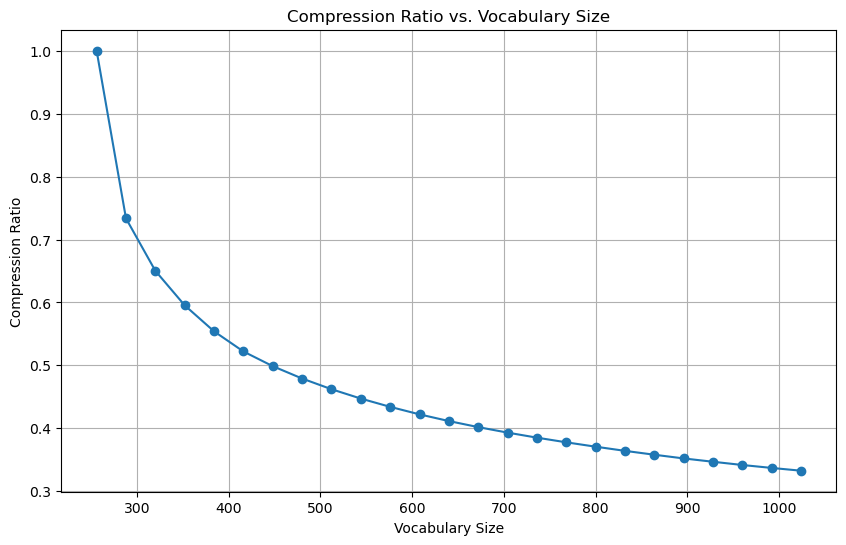

In [8]:


tokens_length = len(new_text)

original_length = len(text)

print(f"original length: {original_length}")
print(f"tokens length: {tokens_length}")
print(f"compression ratio: {tokens_length/original_length}")


def compression_ratio(text, new_vocab_size):
    new_text = text
    old_vocab_size = 256
    num_merges = new_vocab_size - old_vocab_size
    merge = {}
    for i in range(num_merges):
        counts = get_counts(new_text)
        top_pair = max(counts, key=counts.get)
        merge[top_pair] = i + old_vocab_size
        new_text = merge_token(top_pair, new_text, i + old_vocab_size)
    return len(new_text)/len(text)

print(new_text[:50])

import matplotlib.pyplot as plt

def plot_compression_ratio(new_text, max_new_vocab_size):
    x = []  # New vocabulary sizes
    y = []  # Corresponding compression ratios

    for new_vocab_size in range(256, max_new_vocab_size + 1, 32):
        ratio = compression_ratio(text, new_vocab_size)
        x.append(new_vocab_size)
        y.append(ratio)
        print(f"Vocab size: {new_vocab_size}, Compression Ratio: {ratio}")

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.title('Compression Ratio vs. Vocabulary Size')
    plt.xlabel('Vocabulary Size')
    plt.ylabel('Compression Ratio')
    plt.grid(True)
    plt.show()

plot_compression_ratio(text, 1024)

In [9]:

vocab = {i: bytes([i]) for i in range(256)}

for (pair0, pair1), symbol in merge.items():
    
    vocab[symbol] = vocab[pair0] + vocab[pair1]




def decode_sequence(sequence):
    bitstring = b"".join([vocab[token] for token in sequence])
    return bitstring.decode('utf-8', errors='replace')

decode_sequence([37])


'%'

In [10]:
print(merge)

{(101, 32): 256, (116, 32): 257, (116, 104): 258, (105, 110): 259, (44, 32): 260, (115, 32): 261, (111, 117): 262, (121, 32): 263, (101, 114): 264, (100, 32): 265, (97, 110): 266, (73, 32): 267, (32, 258): 268, (97, 32): 269, (111, 110): 270, (259, 39): 271, (111, 119): 272, (111, 32): 273, (108, 105): 274, (108, 108): 275, (99, 107): 276, (101, 97): 277, (121, 262): 278, (111, 114): 279, (101, 110): 280, (268, 256): 281, (271, 32): 282, (109, 32): 283, (101, 10): 284, (32, 109): 285, (104, 97): 286, (105, 116): 287, (73, 39): 288, (107, 256): 289, (259, 103): 290, (117, 115): 291, (101, 101): 292, (226, 128): 293, (118, 264): 294, (110, 272): 295, (105, 103): 296, (105, 261): 297, (278, 32): 298, (280, 32): 299, (105, 257): 300, (116, 273): 301, (115, 116): 302, (115, 104): 303, (274, 289): 304, (288, 283): 305, (99, 104): 306, (118, 256): 307, (108, 97): 308, (293, 153): 309, (266, 265): 310, (111, 100): 311, (10, 267): 312, (117, 276): 313, (258, 256): 314, (114, 97): 315, (101, 115

In [11]:
def encode_sequence(sequence):
    tokens = list(sequence.encode('utf-8'))
    
    
    while len(tokens) >= 2:
        counts = get_counts(tokens)
        pair = min(counts, key=lambda x: merge.get(x, float('inf')))
        # print(pair)
        # print(merge)
        if pair not in merge:
            break
        
        symbol = merge[pair]
        tokens = merge_token(pair, tokens, symbol)
    return tokens



print(encode_sequence("ayyyy whats up 👋"))



[402, 121, 121, 263, 119, 389, 261, 515, 240, 159, 145, 139]


In [12]:
print(decode_sequence(encode_sequence("ayyyy whats up 👋")))


token_delimited_text = [decode_sequence([token]) for token in encode_sequence("hello")]
print(token_delimited_text)

ayyyy whats up 👋
['h', 'ell', 'o']


In [13]:
print(encode_sequence("hello"))

[104, 509, 111]


In [14]:
print([decode_sequence([token]) for token in encode_sequence("shit")])

['shit']


In [15]:
print([decode_sequence([token]) for token in encode_sequence("Sit the fuck back down")])
print(f"compression ratio: {len('Sit the fuck back down')/len([decode_sequence([token]) for token in encode_sequence('Sit the fuck back down')])}")



['S', 'it ', 'the ', 'fuck ', 'back ', 'down']
compression ratio: 3.6666666666666665


In [16]:
import json

# for key, value in vocab.items():
    
#     vocab[key] = value.decode('utf-8', errors='replace')

with open('vocab.json', 'w') as json_file:
    json.dump(vocab, json_file)
    
merge_untupled = {'_'.join(map(str, key)): value for key, value in merge.items()}

with open('merge.json', 'w') as json_file:
    json.dump(merge_untupled, json_file)

TypeError: Object of type bytes is not JSON serializable